In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Fraud.csv')
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
data.corr()

/var/folders/9f/dgt54ch913z_4rcpw0m6g5580000gn/T/ipykernel_92855/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.type,data.isFraud)

0.0013803993713611398

In [10]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.isFlaggedFraud,data.isFraud)

1.6731348276935516e-05

In [11]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.oldbalanceOrg,data.isFraud)

/Users/honey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.009705913197607267

In [12]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.newbalanceOrig,data.isFraud)

/Users/honey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.0008855654913936897

In [13]:
##label encoder

In [14]:
df= data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for ft in objList:
    df[ft] = le.fit_transform(df[ft].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [18]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


In [19]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [20]:
##use the isFlaggedFraud columns wrt 200000 as threshold
df[df.isFlaggedFraud==1]



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,4,4953893.08,5462026,4953893.08,4953893.08,465112,0.0,0.0,1,1
3247297,250,4,1343002.08,329539,1343002.08,1343002.08,43638,0.0,0.0,1,1
3760288,279,4,536624.41,116746,536624.41,536624.41,29788,0.0,0.0,1,1
5563713,387,4,4892193.09,6052892,4892193.09,4892193.09,540034,0.0,0.0,1,1
5996407,425,4,10000000.00,5332564,19585040.37,19585040.37,116289,0.0,0.0,1,1
5996409,425,4,9585040.37,4552191,19585040.37,19585040.37,32302,0.0,0.0,1,1
6168499,554,4,3576297.10,3078566,3576297.10,3576297.10,419584,0.0,0.0,1,1
6205439,586,4,353874.22,2248279,353874.22,353874.22,227867,0.0,0.0,1,1
6266413,617,4,2542664.27,5651751,2542664.27,2542664.27,471714,0.0,0.0,1,1
6281482,646,4,10000000.00,2958273,10399045.08,10399045.08,238527,0.0,0.0,1,1


In [21]:
df['above200000'] = df['amount'] >= 200000.00
df['above200000'] = df.above200000.map({False:0,True:1})

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,above200000
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,1
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,1
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,1
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0,1


In [23]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(df.type,df.above200000)

0.1615584163747207

In [24]:
x_train = data.drop(columns=['step','type','nameOrig','nameDest','isFlaggedFraud','isFraud'])

<Axes: ylabel='Frequency'>

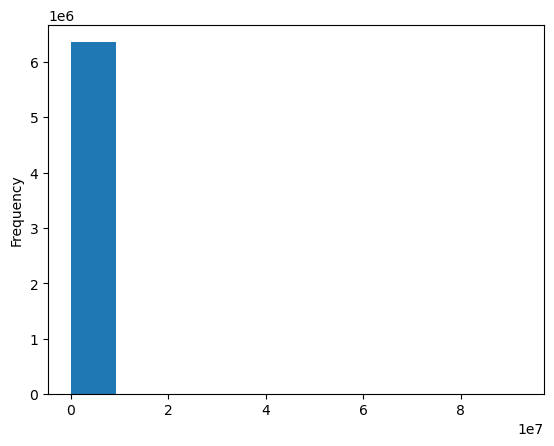

In [25]:
data.amount.plot.hist()

In [26]:
##normalization require
df_new = pd.DataFrame(columns=[x_train.columns])

In [27]:
df_new

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest


In [28]:
df_new['amount'] = (df['amount'] - df['amount'].min()) / (df['amount'].max() -df['amount'].min())
df_new['oldbalanceOrg'] = (df['oldbalanceOrg'] - df['oldbalanceOrg'].min()) / (df['oldbalanceOrg'].max() -data['oldbalanceOrg'].min())
df_new['newbalanceOrig'] = (df['newbalanceOrig'] - df['newbalanceOrig'].min()) / (df['newbalanceOrig'].max() -df['newbalanceOrig'].min())
df_new['oldbalanceDest'] = (df['oldbalanceDest'] - df['oldbalanceDest'].min()) / (df['oldbalanceDest'].max() -df['oldbalanceDest'].min())
df_new['newbalanceDest'] = (df['newbalanceDest'] - df['newbalanceDest'].min()) / (df['newbalanceDest'].max() -df['newbalanceDest'].min())
     


In [29]:

df_new['above200000'] = df.above200000

In [30]:
df_new

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,above200000
0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,0.000002,0.000003,0.000000,0.000000,0.000000,0
3,0.000002,0.000003,0.000000,0.000059,0.000000,0
4,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,0.000954,1
6362616,0.068272,0.105923,0.000000,0.000000,0.000000,1
6362617,0.068272,0.105923,0.000000,0.000192,0.017912,1
6362618,0.009195,0.014265,0.000000,0.000000,0.000000,1


In [31]:
df_new

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,above200000
0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,0.000002,0.000003,0.000000,0.000000,0.000000,0
3,0.000002,0.000003,0.000000,0.000059,0.000000,0
4,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,0.000954,1
6362616,0.068272,0.105923,0.000000,0.000000,0.000000,1
6362617,0.068272,0.105923,0.000000,0.000192,0.017912,1
6362618,0.009195,0.014265,0.000000,0.000000,0.000000,1


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test  = train_test_split(df_new, df.isFraud,test_size=0.2)

In [33]:
##Apply the random forest
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
rf=RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270915
           1       0.97      0.66      0.78      1609

    accuracy                           1.00   1272524
   macro avg       0.99      0.83      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbm = GradientBoostingClassifier( loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gbm.fit(X_train, y_train)
y_pred_gbm= gbm.predict(X_test)
print(classification_report(y_test, y_pred_gbm))

/Users/honey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270915
           1       0.00      0.00      0.00      1609

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



/Users/honey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/honey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 For data cleaning , remove rows with missing values. Even removing of outliers as they doesn't fall inside the range.

2 I used ML model, like Random Forest and Gradient Boost, as they have good accuracy with respect to other models. Also i used the information provided to us for the isFlaggedFraud column, as it helped to decrease our datset size and thus the good training model.

3 As part of feature selection we have used correlation coeffecient. Columns with low correlation value with the target feature is eliminated. 

4 It can have stratified sampling and cross-validation to lessen the chance of overfitting and equally distributed dataset. Apart from confusion matrix precision score and accuracy can also be used.

5 The key factors that predict fraudulent customers would likely include high transaction amounts and sudden changes in account balances.

6 These factors make sense as they are indicative of suspicious activity that may be indicative of fraud. High transaction amounts and sudden changes in account balances may be indicative of an attempt to steal funds and money laundring.

7 The company can prevent fraud by implementing transaction monitoring, account monitoring, and two-factor authentication, and training its employees to identify and report suspicious activity.

8 The company can assess the effectiveness of its measures by tracking fraudulent transactions before and after implementation, and conducting regular audits to identify potential fraud vulnerabilities.